### GOAL: 

onset and slope

In [2]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

import pandas as pd
import seaborn as sns

import load_data
import analysis_helper

pd.options.mode.chained_assignment = None  # default='warn'

#### Load Files and Format freq

In [3]:
#load metadata
path_metadata = "C:\\Users\\swind\\Documents\\lab work\\lab work barth\\behavior analysis\\Eunsol data\\Animal lists.xlsx"
hm4di_metadata = pd.read_excel(path_metadata)
path_metasat = "C:\\Users\\swind\\Documents\\lab work\\lab work barth\\behavior analysis\\Eunsol data\\behavior metasheet.xlsx"
sat_metadata = pd.read_excel(path_metasat)

#load data for prelim animals
prelim_path_SAT = "C:\\Users\\swind\\Documents\\lab work\\lab work barth\\behavior analysis\\Eunsol data\\prelim\\SAT"
prelim_path_100_80 = "C:\\Users\\swind\\Documents\\lab work\\lab work barth\\behavior analysis\\Eunsol data\\prelim\\100 80 SAT"
prelim = load_data.load_all_data([(prelim_path_SAT, "SAT")], prelim_path_100_80, hm4di_metadata, sat_metadata)

#load data for all animals
all_SAT = "C:\\Users\\swind\\Documents\\lab work\\lab work barth\\behavior analysis\\Eunsol data\\all animals\\SAT"
all_100_80 = "C:\\Users\\swind\\Documents\\lab work\\lab work barth\\behavior analysis\\Eunsol data\\all animals\\100 80"
all_mch = "C:\\Users\\swind\\Documents\\lab work\\lab work barth\\behavior analysis\\Eunsol data\\all animals\\mcherry"
all_hm4di = "C:\\Users\\swind\\Documents\\lab work\\lab work barth\\behavior analysis\\Eunsol data\\all animals\\hM4Di SAT"
all_animals = load_data.load_all_data([(all_SAT, "SAT"), (all_mch, "mcherry"), (all_hm4di, "hm4di")], all_100_80, hm4di_metadata, sat_metadata).reset_index()
all_animals = all_animals[(all_animals["animal"] != "JOV1")].set_index(["condition", "animal", "trial no"])

SAT
GSB8
GXS5
JSS4
NJO1
NLB10
NLB8
NLG3
NLN3
SAT
GKO6
GSB8
GXC7
GXS4
GXS5
JND2
JOV1
JSS4
NFZ13
NFZ4
NGX5
NJO1
mcherry
MJL2
MJN2
MJN3
MJN5
MYC4
MZG4
MZG5
NBE11
NCY1
NCY4
NCY6
NDR1
NIO15
NIO16
hm4di
LWP2
LWP4
LWP6
LWP8
MKV10
MKV11
MKV14
NAS9
NBX7
NBX9
NEJ1
NJW5
NKZ10
NKZ3
NKZ4
NKZ7
NLB1
NLB10
NLB3
NLB8
NLG3
NLN3
NLN5
NLV2
NLV3
NLV5


In [4]:
aa = all_animals.reset_index()
#drop the last sample from each trial since it is duplicated
aa = aa[aa.groupby(["condition", "animal", "trial no"]).cumcount(ascending=False) > 0]
aa["acc"] = pd.to_timedelta(aa["acc"], unit="day")
aa = analysis_helper.deliverydelta(aa)

aa

condition animal  trial no                     timestamp  poke  \
0               SAT   GKO6         1 2019-05-01 12:37:04.849999872     1   
1               SAT   GKO6         1 2019-05-01 12:37:04.950000128     0   
2               SAT   GKO6         1 2019-05-01 12:37:05.049999872     0   
3               SAT   GKO6         1 2019-05-01 12:37:05.150000128     0   
4               SAT   GKO6         1 2019-05-01 12:37:05.249999872     0   
...             ...    ...       ...                           ...   ...   
1470778  SAT_100_80   NLV5       712 2023-01-02 11:38:52.880000000     0   
1470779  SAT_100_80   NLV5       712 2023-01-02 11:38:52.980000000     0   
1470780  SAT_100_80   NLV5       712 2023-01-02 11:38:53.069999872     0   
1470781  SAT_100_80   NLV5       712 2023-01-02 11:38:53.180000000     0   
1470782  SAT_100_80   NLV5       712 2023-01-02 11:38:53.280000000     0   

         lick  water                  delay trial type   age sex  \
0           0      3 0 days 00:00:00.696000      water  31.0   M   
1           0      3 0 days 00:00:00.696000      water  31.0   M   
2           0      3 0 days 00:00:00.696000      water  31.0   M   
3           0      3 0 days 00:00:00.696000      water  31.0   M   
4           0      3 0 days 00:00:00.696000      water  31.0   M   
...       ...    ...                    ...        ...   ...  ..   
1470778     0      9        0 days 00:00:00      blank  25.0   F   
1470779     0      9        0 days 00:00:00      blank  25.0   F   
1470780     0      9        0 days 00:00:00      blank  25.0   F   
1470781     0      9        0 days 00:00:00      blank  25.0   F   
1470782     0      9        0 days 00:00:00      blank  25.0   F   

               strain           SAT_start    acc              delivery delta  
0        Sscre x Ai32 2019-05-03 12:25:00 2 days    -1 days +23:59:59.304000  
1        Sscre x Ai32 2019-05-03 12:25:00 2 days -1 days +23:59:59.404000256  
2        Sscre x Ai32 2019-05-03 12:25:00 2 days    -1 days +23:59:59.504000  
3        Sscre x Ai32 2019-05-03 12:25:00 2 days -1 days +23:59:59.604000256  
4        Sscre x Ai32 2019-05-03 12:25:00 2 days    -1 days +23:59:59.704000  
...               ...                 ...    ...                         ...  
1470778           C57 2023-01-01 13:56:14 1 days   0 days 00:00:01.406999872  
1470779           C57 2023-01-01 13:56:14 1 days   0 days 00:00:01.506999872  
1470780           C57 2023-01-01 13:56:14 1 days   0 days 00:00:01.596999744  
1470781           C57 2023-01-01 13:56:14 1 days   0 days 00:00:01.706999872  
1470782           C57 2023-01-01 13:56:14 1 days   0 days 00:00:01.806999872  

[1470783 rows x 15 columns]

In [23]:
data=aa
freq_bin=300

keep=["timestamp", "age", "sex", "strain", "SAT_start", "acc", "delivery delta"]
values=["lick", "poke"]
index=["condition", "animal", "trial no", "trial type"]

group = data.set_index("timestamp").groupby(index)
licks = group.rolling(window=pd.to_timedelta(freq_bin, unit="ms"))[values].sum()/(freq_bin/1000)
keep = data.set_index(index)[keep].set_index("timestamp",append=True)

data_roll = pd.concat([licks, keep], axis=1).reset_index()

In [24]:
keep=["timestamp", "lick", "poke", "age", "sex", "strain", "SAT_start", "acc"]

group = data_roll.groupby(["condition", "animal", "trial no", "trial type", pd.Grouper(key="delivery delta", freq=pd.offsets.Milli(100))])
keep = group[keep].first()

data_sample = keep.reset_index()

In [25]:
data = data_sample
trial_bin="4h"

data = data.set_index(["condition", "animal", "trial no"])
data["trial time"] = data.groupby(["condition", "animal", "trial no"])["timestamp"].first()
data = data.reset_index()

group = data.groupby(["condition", "animal", "trial no", "trial type", "delivery delta", pd.Grouper(key="trial time", freq=trial_bin)])
data = group.first()
data = data.reset_index()

data = analysis_helper.delta(data, key="trial time")

In [26]:
min_trials = 10
min_blank = 2
min_water = 2

data = data.set_index(["condition", "animal", "delta","delivery delta", "trial type"])
group = data.groupby(["condition", "animal", "delta","delivery delta", "trial type"])
counts = group.count().unstack(level="trial type")
cond = (counts.loc[:, ("trial no", "blank")] > min_blank) & (counts.loc[:, ("trial no", "water")] > min_water) 
data = data[cond]

data = data.reset_index().set_index(["condition", "animal", "delta","delivery delta"])
total_group = data.groupby(["condition", "animal", "delta","delivery delta"]) 
total_counts = total_group.count()

data = data[total_counts["trial no"] > min_trials]
data = data.reset_index()

In [27]:
keep=["age", "sex", "strain", "SAT_start", "acc"]

data_bin = data.groupby(["condition", "animal", "trial type", "delta", "delivery delta"])
lick = data_bin["lick"].mean()
keep = data_bin[keep].first()

data_bin = pd.concat([lick, keep], axis=1).reset_index()
data_bin

condition animal trial type             delta           delivery delta  \
0           SAT   GKO6      blank -2 days +08:00:00 -1 days +23:59:59.200000   
1           SAT   GKO6      blank -2 days +08:00:00 -1 days +23:59:59.300000   
2           SAT   GKO6      blank -2 days +08:00:00 -1 days +23:59:59.400000   
3           SAT   GKO6      blank -2 days +08:00:00 -1 days +23:59:59.500000   
4           SAT   GKO6      blank -2 days +08:00:00 -1 days +23:59:59.600000   
...         ...    ...        ...               ...                      ...   
36383   mcherry  NIO16      water   0 days 16:00:00   0 days 00:00:01.300000   
36384   mcherry  NIO16      water   0 days 16:00:00   0 days 00:00:01.400000   
36385   mcherry  NIO16      water   0 days 16:00:00   0 days 00:00:01.500000   
36386   mcherry  NIO16      water   0 days 16:00:00   0 days 00:00:01.600000   
36387   mcherry  NIO16      water   0 days 16:00:00   0 days 00:00:01.700000   

           lick   age   sex        strain           SAT_start    acc  
0      2.500000  31.0     M  Sscre x Ai32 2019-05-03 12:25:00 2 days  
1      3.000000  31.0     M  Sscre x Ai32 2019-05-03 12:25:00 2 days  
2      4.666667  31.0     M  Sscre x Ai32 2019-05-03 12:25:00 2 days  
3      6.111111  31.0     M  Sscre x Ai32 2019-05-03 12:25:00 2 days  
4      7.101449  31.0     M  Sscre x Ai32 2019-05-03 12:25:00 2 days  
...         ...   ...   ...           ...                 ...    ...  
36383  4.400000   NaN  None          None 2022-12-08 12:00:00 1 days  
36384  3.733333   NaN  None          None 2022-12-08 12:00:00 1 days  
36385  1.666667   NaN  None          None 2022-12-08 12:00:00 1 days  
36386  1.666667   NaN  None          None 2022-12-08 12:00:00 1 days  
36387  2.307692   NaN  None          None 2022-12-08 12:00:00 1 days  

[36388 rows x 11 columns]

In [28]:
data_thresh = analysis_helper.thresh(data_bin, 200, 3000, False, True)
data_thresh

condition animal trial type             delta           delivery delta  \
6           SAT   GKO6      blank -2 days +08:00:00 -1 days +23:59:59.800000   
7           SAT   GKO6      blank -2 days +08:00:00 -1 days +23:59:59.900000   
8           SAT   GKO6      blank -2 days +08:00:00          0 days 00:00:00   
9           SAT   GKO6      blank -2 days +08:00:00   0 days 00:00:00.100000   
10          SAT   GKO6      blank -2 days +08:00:00   0 days 00:00:00.200000   
...         ...    ...        ...               ...                      ...   
36383   mcherry  NIO16      water   0 days 16:00:00   0 days 00:00:01.300000   
36384   mcherry  NIO16      water   0 days 16:00:00   0 days 00:00:01.400000   
36385   mcherry  NIO16      water   0 days 16:00:00   0 days 00:00:01.500000   
36386   mcherry  NIO16      water   0 days 16:00:00   0 days 00:00:01.600000   
36387   mcherry  NIO16      water   0 days 16:00:00   0 days 00:00:01.700000   

           lick   age   sex        strain           SAT_start    acc  
6      7.708333  31.0     M  Sscre x Ai32 2019-05-03 12:25:00 2 days  
7      8.333333  31.0     M  Sscre x Ai32 2019-05-03 12:25:00 2 days  
8      8.709677  31.0     M  Sscre x Ai32 2019-05-03 12:25:00 2 days  
9      8.125000  31.0     M  Sscre x Ai32 2019-05-03 12:25:00 2 days  
10     7.812500  31.0     M  Sscre x Ai32 2019-05-03 12:25:00 2 days  
...         ...   ...   ...           ...                 ...    ...  
36383  4.400000   NaN  None          None 2022-12-08 12:00:00 1 days  
36384  3.733333   NaN  None          None 2022-12-08 12:00:00 1 days  
36385  1.666667   NaN  None          None 2022-12-08 12:00:00 1 days  
36386  1.666667   NaN  None          None 2022-12-08 12:00:00 1 days  
36387  2.307692   NaN  None          None 2022-12-08 12:00:00 1 days  

[28796 rows x 11 columns]

In [29]:
group = data_thresh.set_index(["condition", "animal", "delta", "delivery delta"]).groupby("trial type")
water = group.get_group("water")["lick"]
blank = group.get_group("blank")["lick"]
data_perf = water - blank
data_perf = data_perf.reset_index()
data_perf["delta_float"] = data_perf["delta"].astype("timedelta64[h]")
data_perf["delivery delta_float"] = data_perf["delivery delta"].astype("timedelta64[ms]")
data_perf

condition animal             delta           delivery delta      lick  \
0           SAT   GKO6 -2 days +08:00:00 -1 days +23:59:59.800000  0.489865   
1           SAT   GKO6 -2 days +08:00:00 -1 days +23:59:59.900000  0.451713   
2           SAT   GKO6 -2 days +08:00:00          0 days 00:00:00  0.419452   
3           SAT   GKO6 -2 days +08:00:00   0 days 00:00:00.100000  0.529434   
4           SAT   GKO6 -2 days +08:00:00   0 days 00:00:00.200000  0.926239   
...         ...    ...               ...                      ...       ...   
14393   mcherry  NIO16   0 days 16:00:00   0 days 00:00:01.300000  2.733333   
14394   mcherry  NIO16   0 days 16:00:00   0 days 00:00:01.400000  2.066667   
14395   mcherry  NIO16   0 days 16:00:00   0 days 00:00:01.500000 -0.833333   
14396   mcherry  NIO16   0 days 16:00:00   0 days 00:00:01.600000  0.833333   
14397   mcherry  NIO16   0 days 16:00:00   0 days 00:00:01.700000  0.641026   

       delta_float  delivery delta_float  
0            -40.0                -200.0  
1            -40.0                -100.0  
2            -40.0                   0.0  
3            -40.0                 100.0  
4            -40.0                 200.0  
...            ...                   ...  
14393         16.0                1300.0  
14394         16.0                1400.0  
14395         16.0                1500.0  
14396         16.0                1600.0  
14397         16.0                1700.0  

[14398 rows x 7 columns]

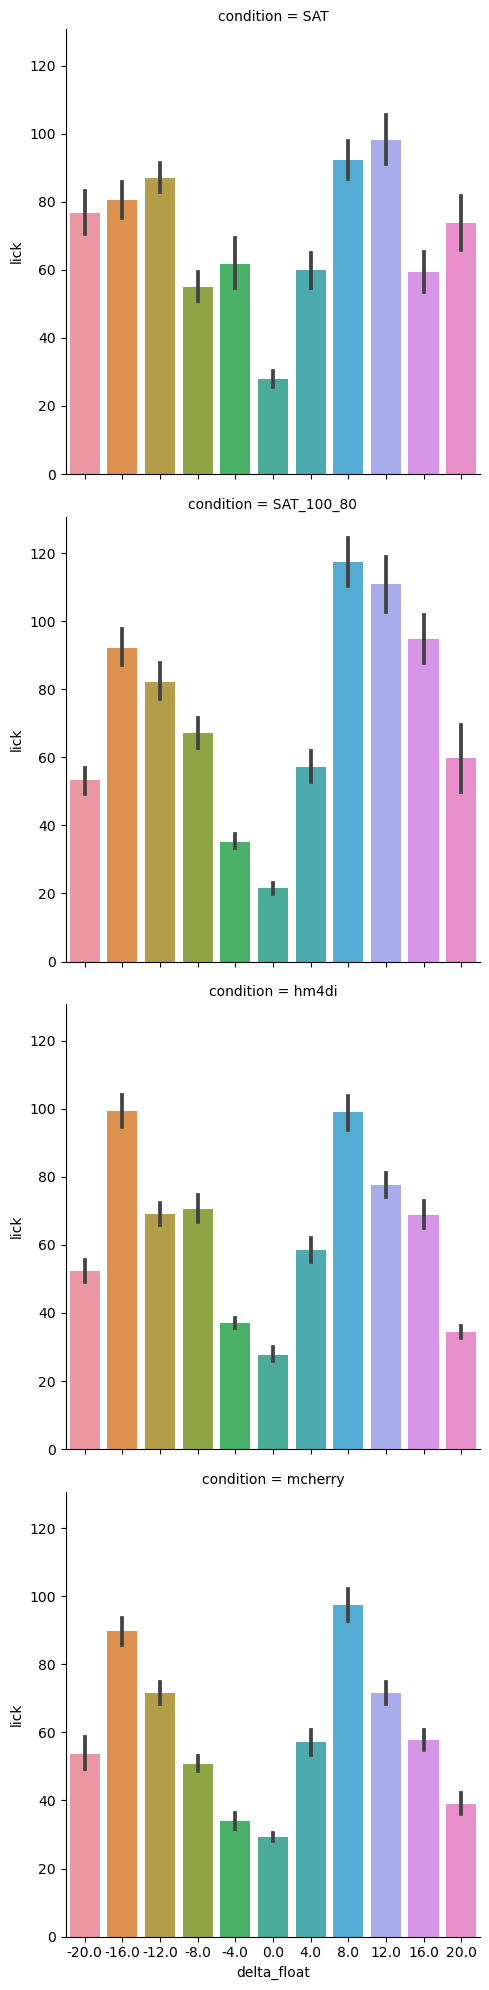

In [12]:
counts = data.groupby(["condition", "animal", "delta", "delivery delta"]).count().reset_index()
counts["delta_float"] = counts["delta"].astype("timedelta64[h]")
cond = (counts["delta_float"] < 24) & (counts["delta_float"] > -24) 
sns.catplot(counts[cond], x="delta_float", y="lick", col="condition", col_wrap=1, kind='bar')

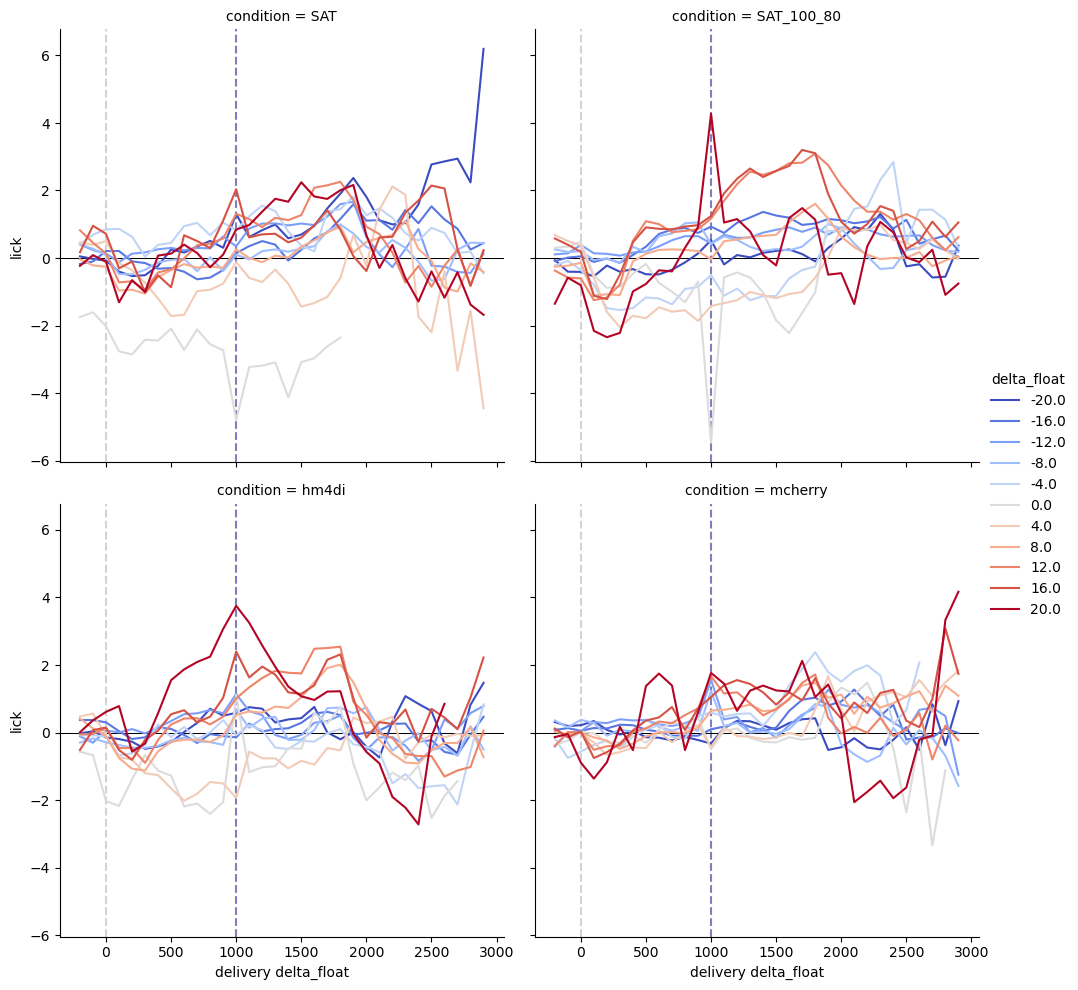

In [13]:
cond = (data_perf["delta_float"] < 24) & (data_perf["delta_float"] > -24) 
g = sns.relplot(data=data_perf[cond],kind="line",x="delivery delta_float", 
                y="lick",col="condition", col_wrap=2,hue="delta_float", palette="coolwarm", errorbar=None,legend="full")
for ax in g.axes.flat:
    ax.axhline(y=0, xmin=0, xmax=1, ls="-", lw=0.75,color="black", zorder=0)
    ax.axvline(x=0, ymin=0, ymax=1, ls="--", color="lightgrey", zorder=0)
    ax.axvline(x=1000, ymin=0, ymax=1, ls="--", color="navy", alpha=0.5, zorder=0)

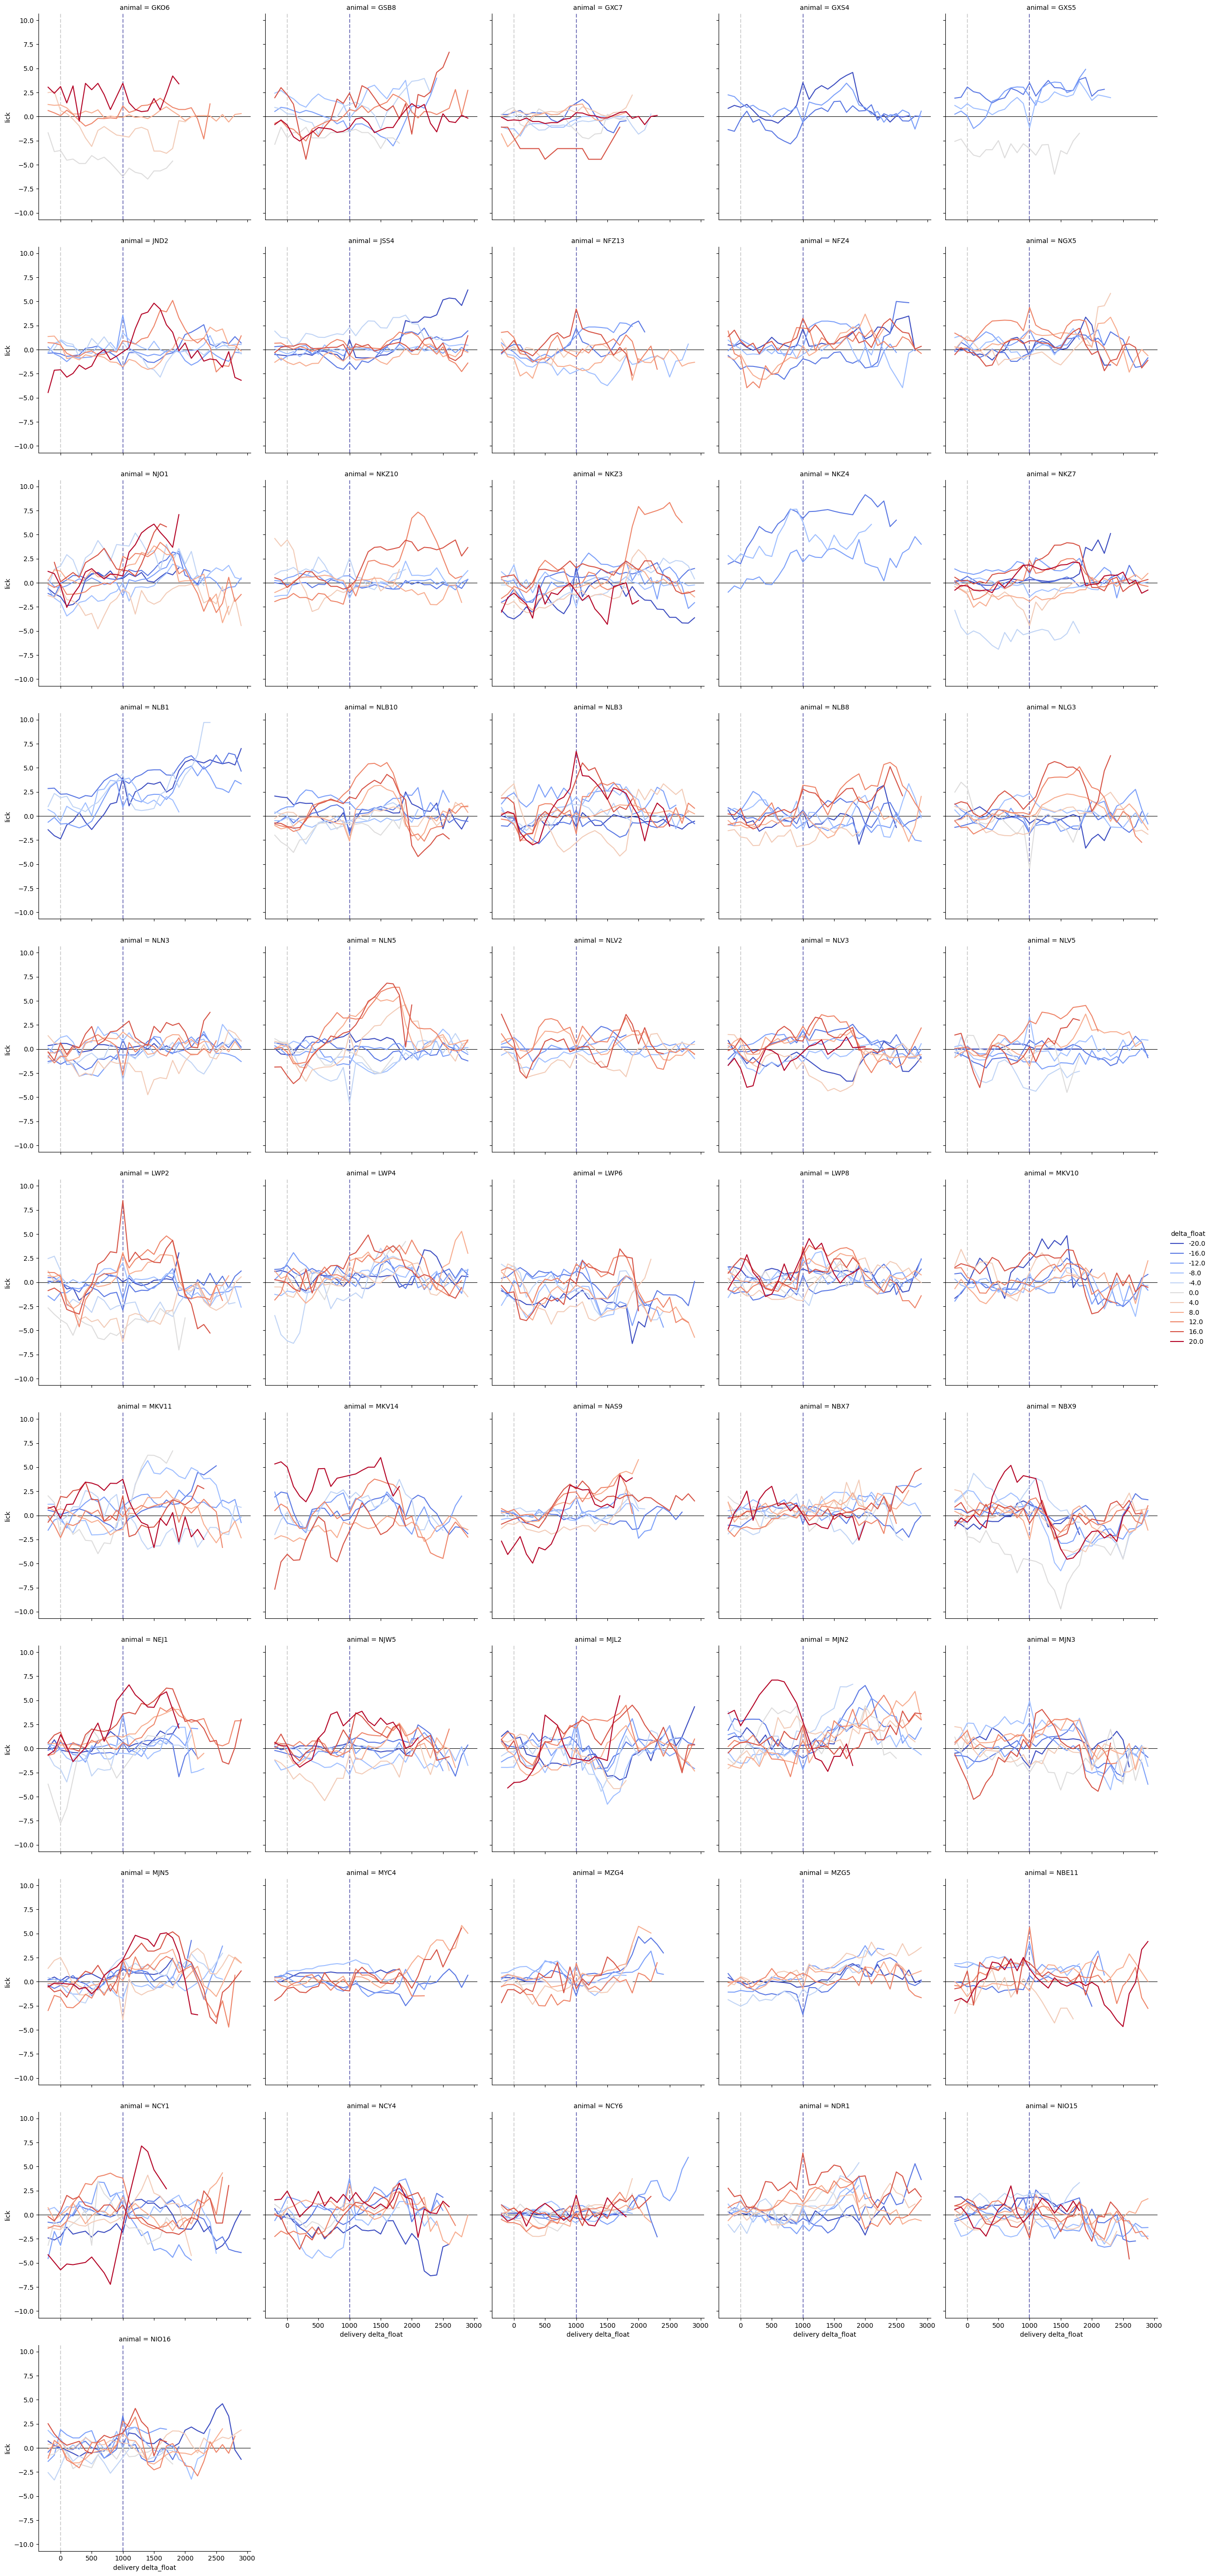

In [30]:
cond = (data_perf["delta_float"] < 24) & (data_perf["delta_float"] > -24) 
g = sns.relplot(data=data_perf[cond],kind="line",x="delivery delta_float", 
                y="lick",col="animal", col_wrap=5,hue="delta_float", palette="coolwarm", errorbar=None,legend="full")
for ax in g.axes.flat:
    ax.axhline(y=0, xmin=0, xmax=1, ls="-", lw=0.75,color="black", zorder=0)
    ax.axvline(x=0, ymin=0, ymax=1, ls="--", color="lightgrey", zorder=0)
    ax.axvline(x=1000, ymin=0, ymax=1, ls="--", color="navy", alpha=0.5, zorder=0)

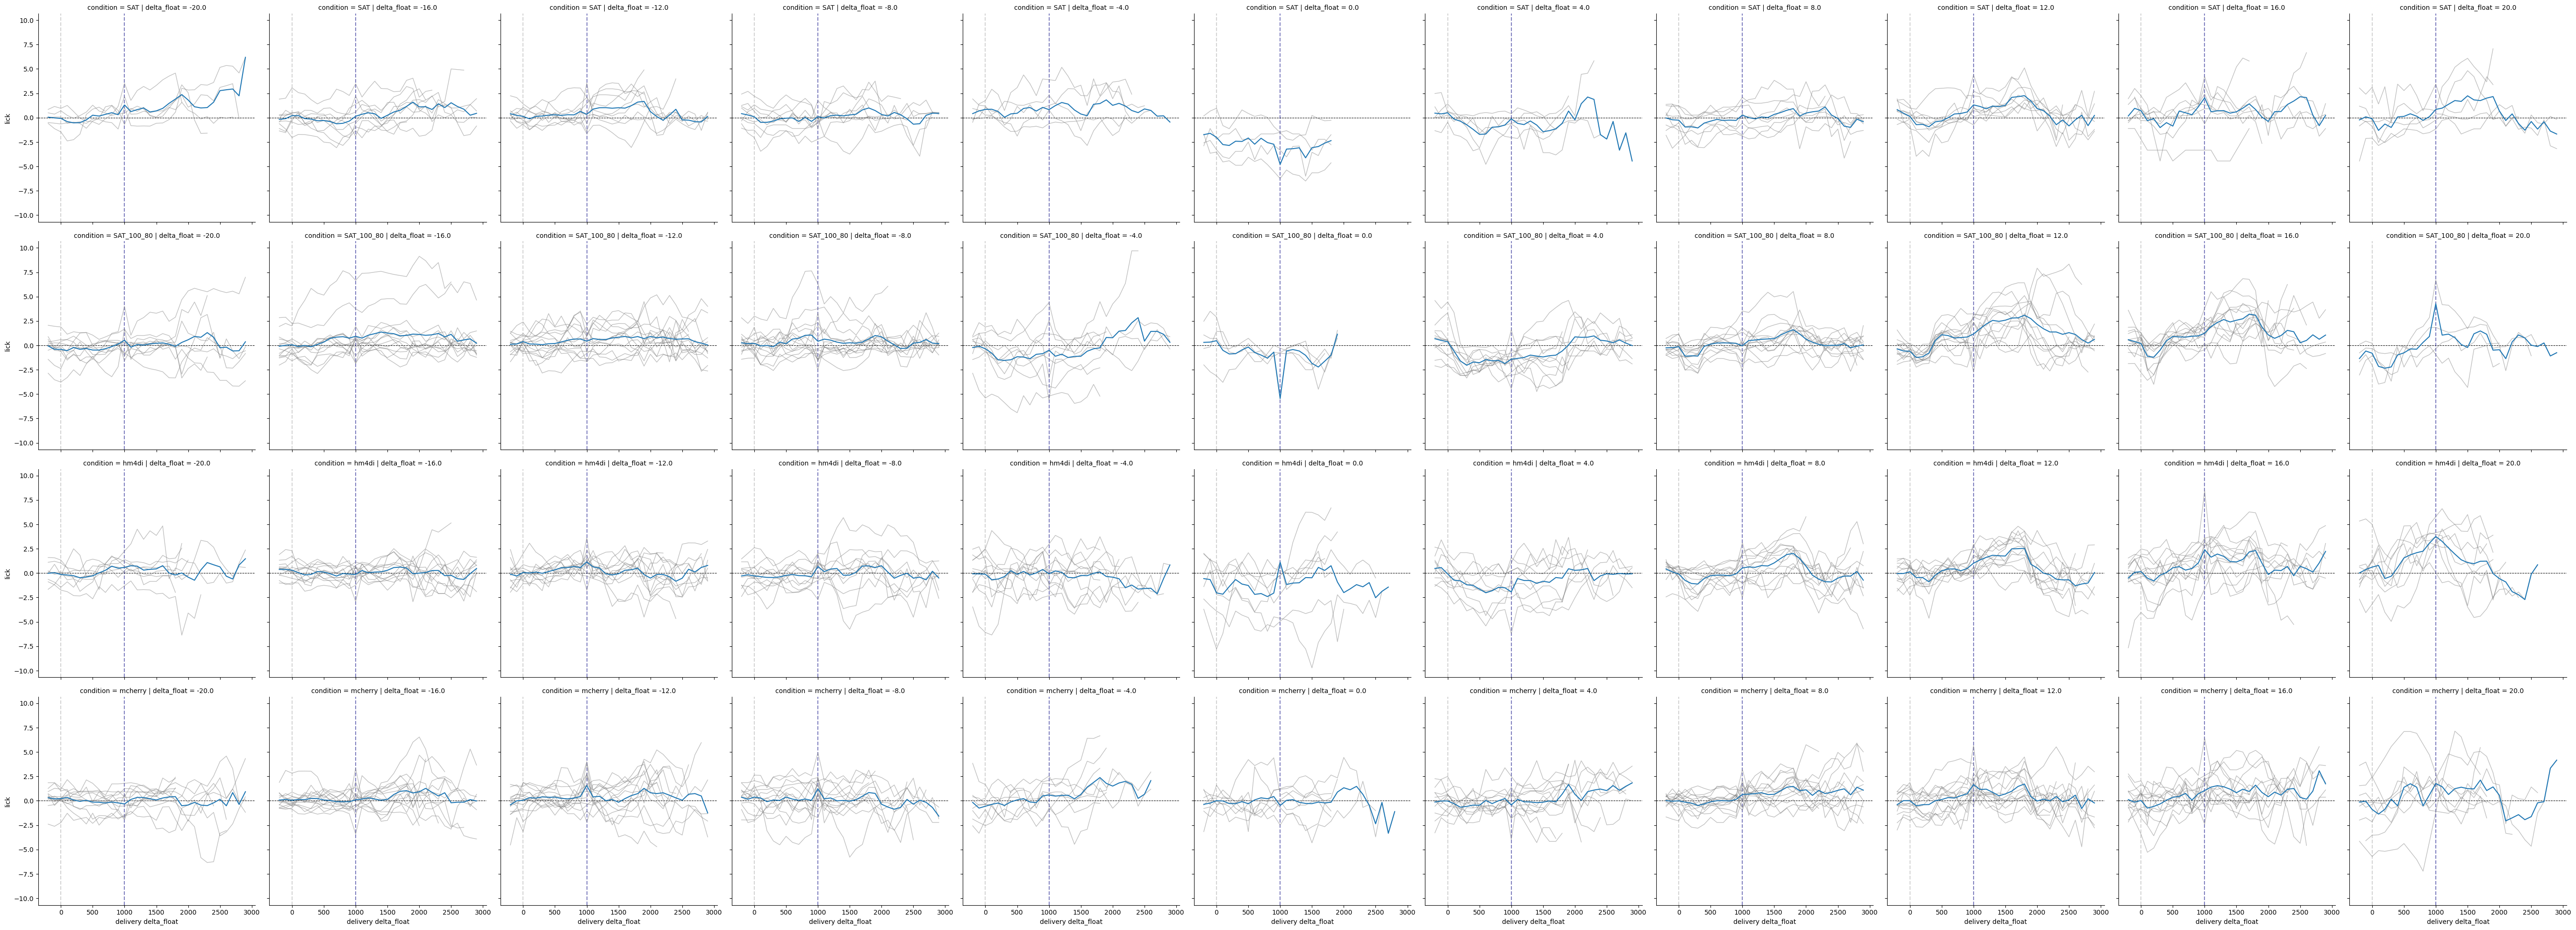

In [14]:
cond = (data_perf["delta_float"] < 24) & (data_perf["delta_float"] > -24) 
g = sns.relplot(data=data_perf[cond],kind="line",x="delivery delta_float", 
                y="lick",col="delta_float", row="condition", errorbar=None, zorder=5)
for (train_type, time), ax in g.axes_dict.items():
    an_cond = data_perf["condition"] == train_type
    time_cond = data_perf["delta_float"] == time
    sns.lineplot(
            data=data_perf[cond & an_cond & time_cond], x="delivery delta_float", y="lick", hue="animal", 
            palette=["grey"], alpha=0.5,linewidth=1, ax=ax, legend=False)
    ax.axhline(y=0, xmin=0, xmax=1, ls="--", lw=0.75,color="black", zorder=0)
    ax.axvline(x=0, ymin=0, ymax=1, ls="--", color="lightgrey", zorder=0)
    ax.axvline(x=1000, ymin=0, ymax=1, ls="--", color="navy", alpha=0.5, zorder=0)

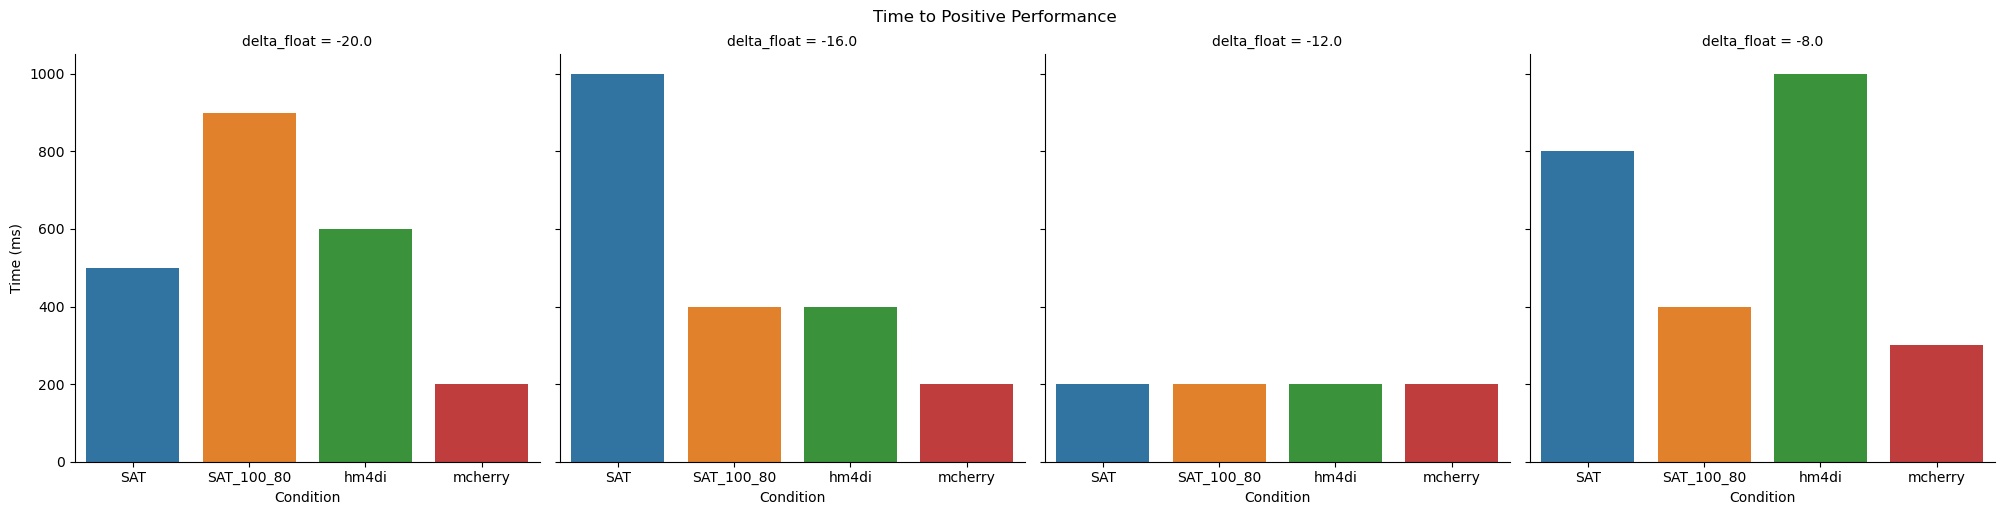

In [15]:
perf_avg = data_perf.groupby(["condition", "delta", "delivery delta"])["lick"].mean().reset_index()
perf_avg["delta_float"] = perf_avg["delta"].astype("timedelta64[h]")
perf_avg["delivery delta_float"] = perf_avg["delivery delta"].astype("timedelta64[ms]")
cond = (perf_avg["delta_float"] < -4) & (perf_avg["delta_float"] > -24) & (perf_avg["lick"] > 0) & (perf_avg["delivery delta_float"] > 100)
pt = perf_avg[cond].groupby(["condition", "delta"]).first().reset_index()
g = sns.catplot(data=pt, kind="bar", x="condition", y="delivery delta_float", col="delta_float", col_wrap=5)
g.fig.suptitle("Time to Positive Performance", x=0.4, y=1.02)
g.set_xlabels("Condition")
g.set_ylabels("Time (ms)")    

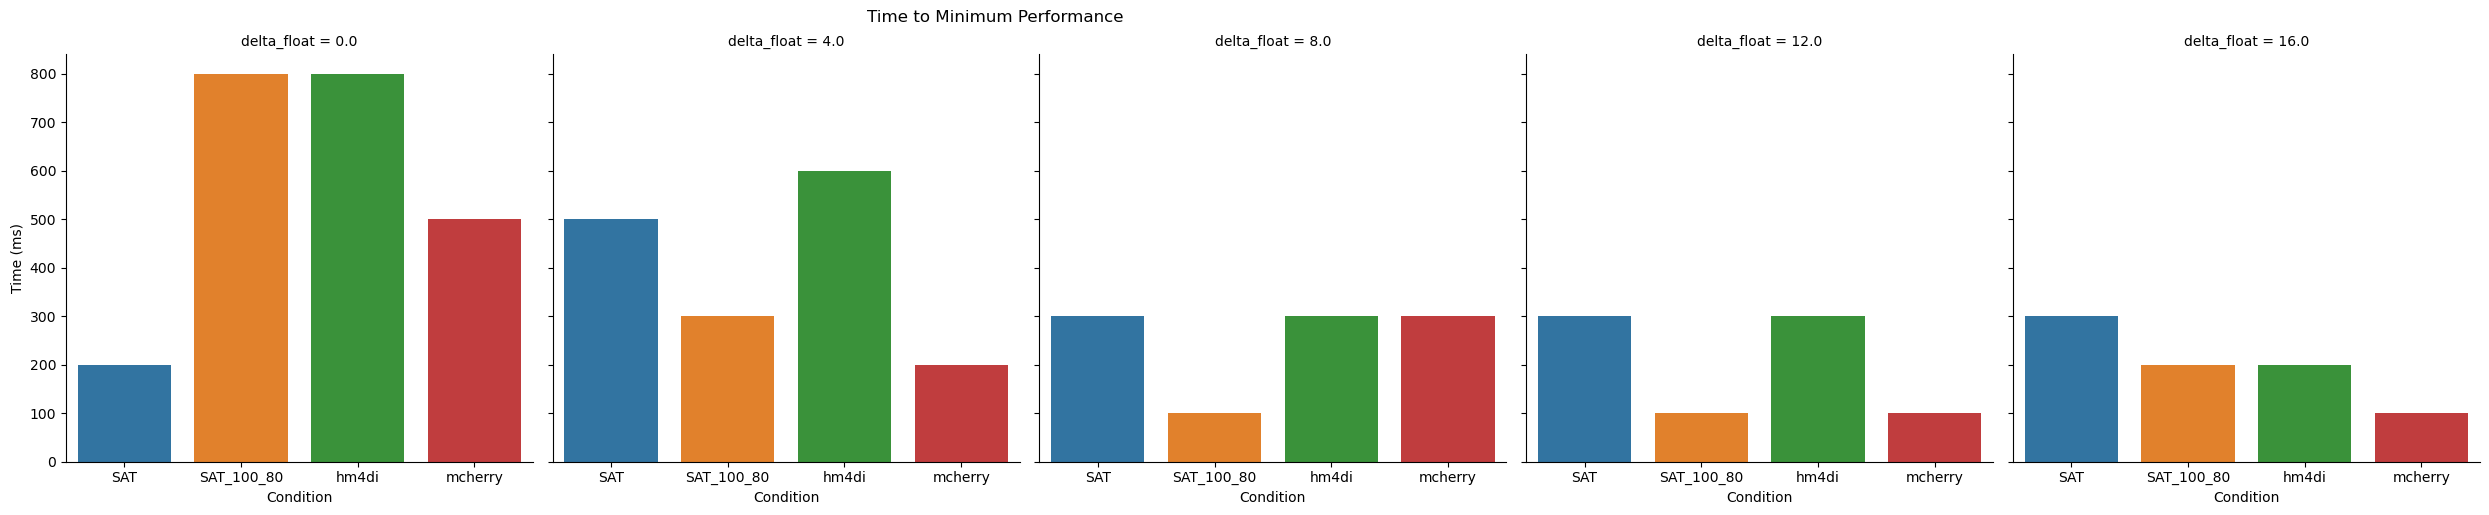

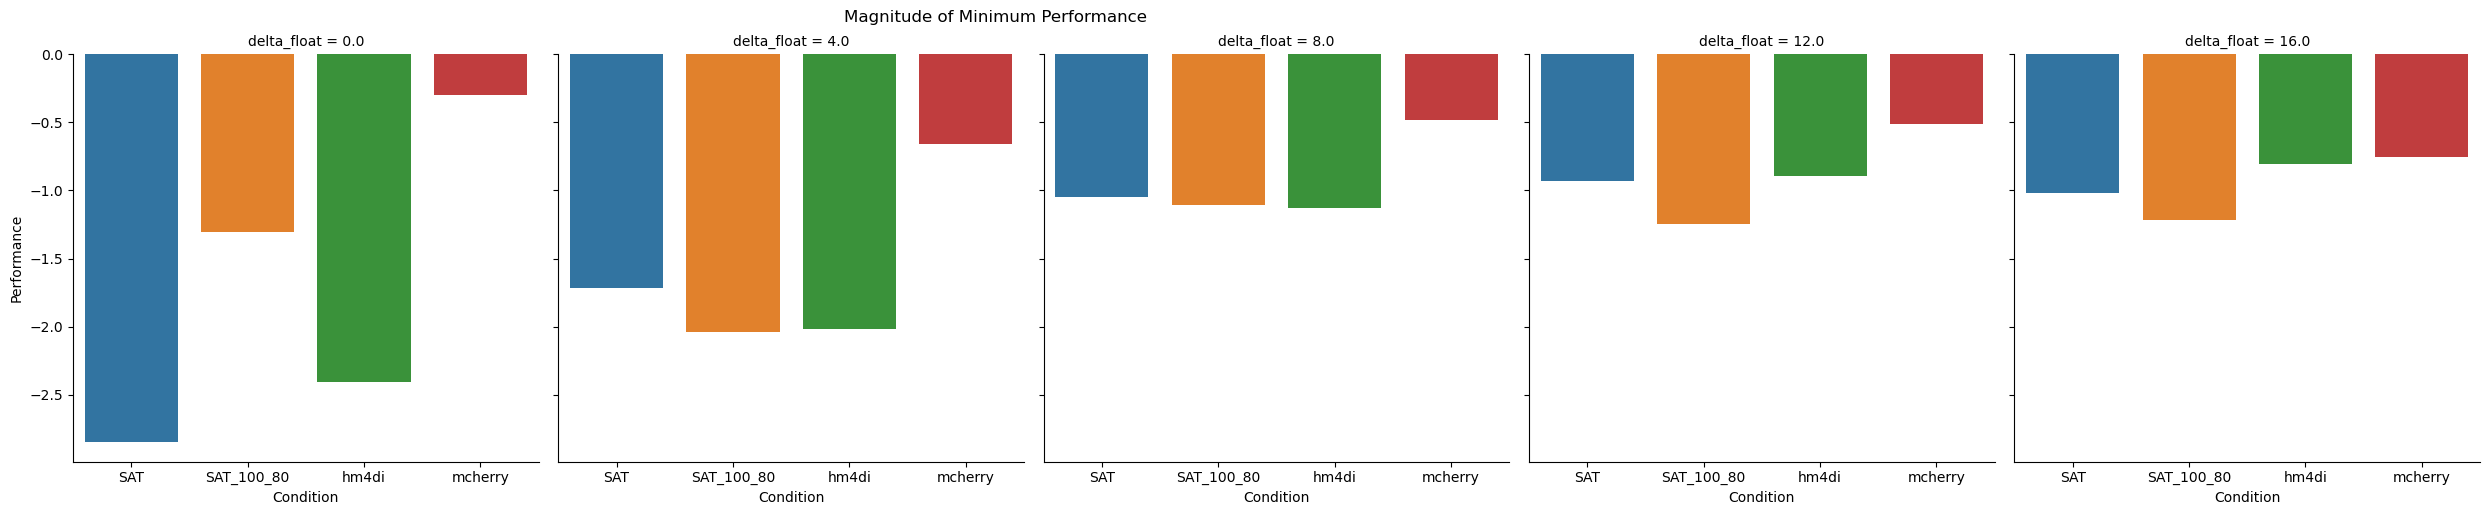

In [16]:
perf_avg = data_perf.groupby(["condition", "delta", "delivery delta"])["lick"].mean().reset_index()
perf_avg["delta_float"] = perf_avg["delta"].astype("timedelta64[h]")
perf_avg["delivery delta_float"] = perf_avg["delivery delta"].astype("timedelta64[ms]")
cond = (perf_avg["delta_float"] < 20) & (perf_avg["delta_float"] >= 0) & (perf_avg["delivery delta_float"] > 0) & (perf_avg["delivery delta_float"] < 1000)
pt_puff = perf_avg[cond].sort_values("lick").groupby(["condition", "delta"]).first().reset_index()
g = sns.catplot(data=pt_puff, kind="bar", x="condition", y="delivery delta_float", col="delta_float", col_wrap=5)
g.fig.suptitle("Time to Minimum Performance", x=0.4, y=1.02)
g.set_xlabels("Condition")
g.set_ylabels("Time (ms)")    
g = sns.catplot(data=pt_puff, kind="bar", x="condition", y="lick", col="delta_float", col_wrap=5)
g.fig.suptitle("Magnitude of Minimum Performance", x=0.4, y=1.02)
g.set_xlabels("Condition")
g.set_ylabels("Performance")    

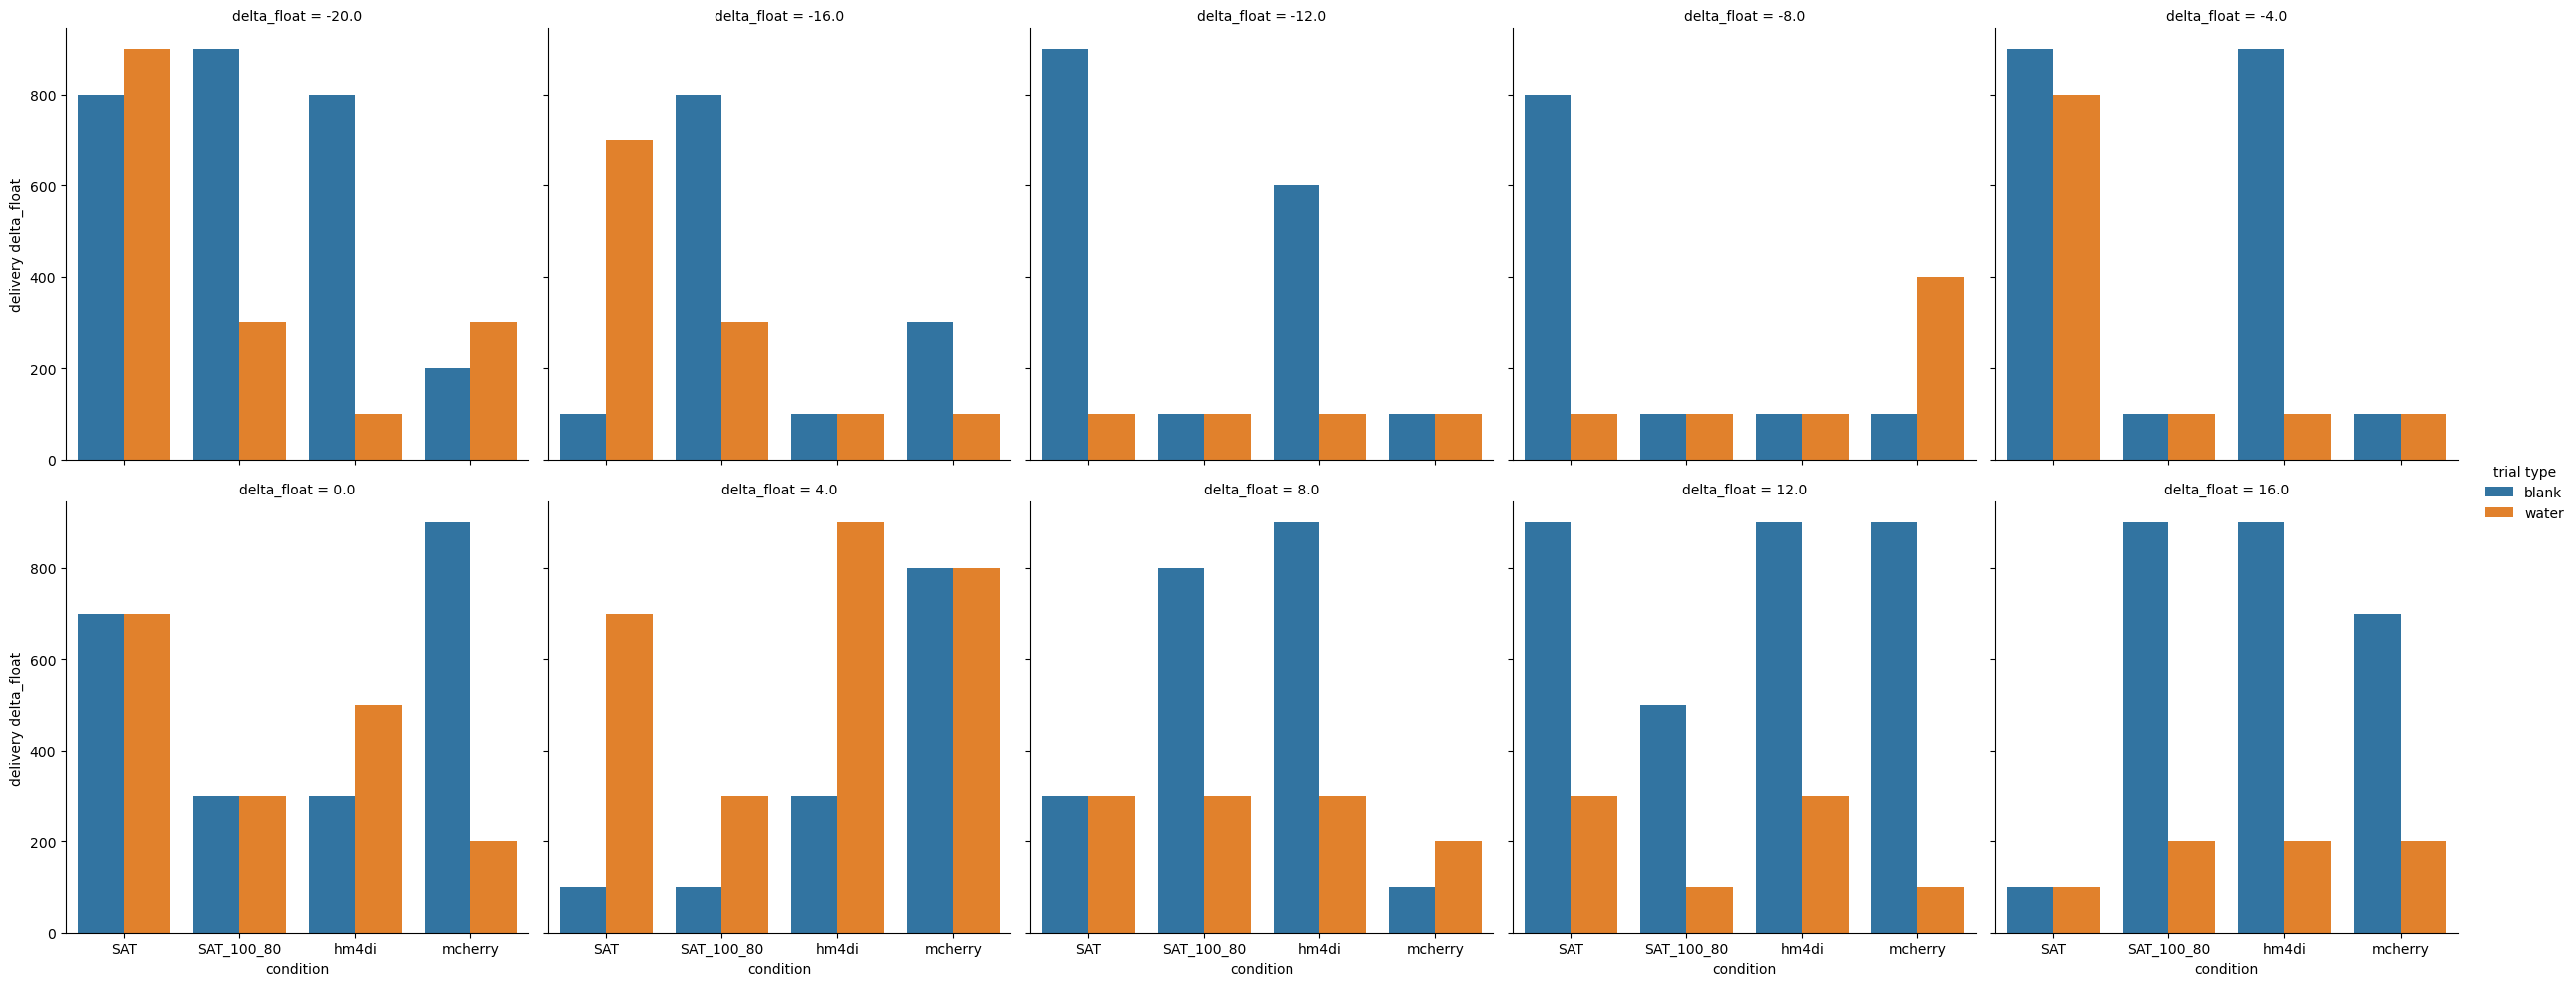

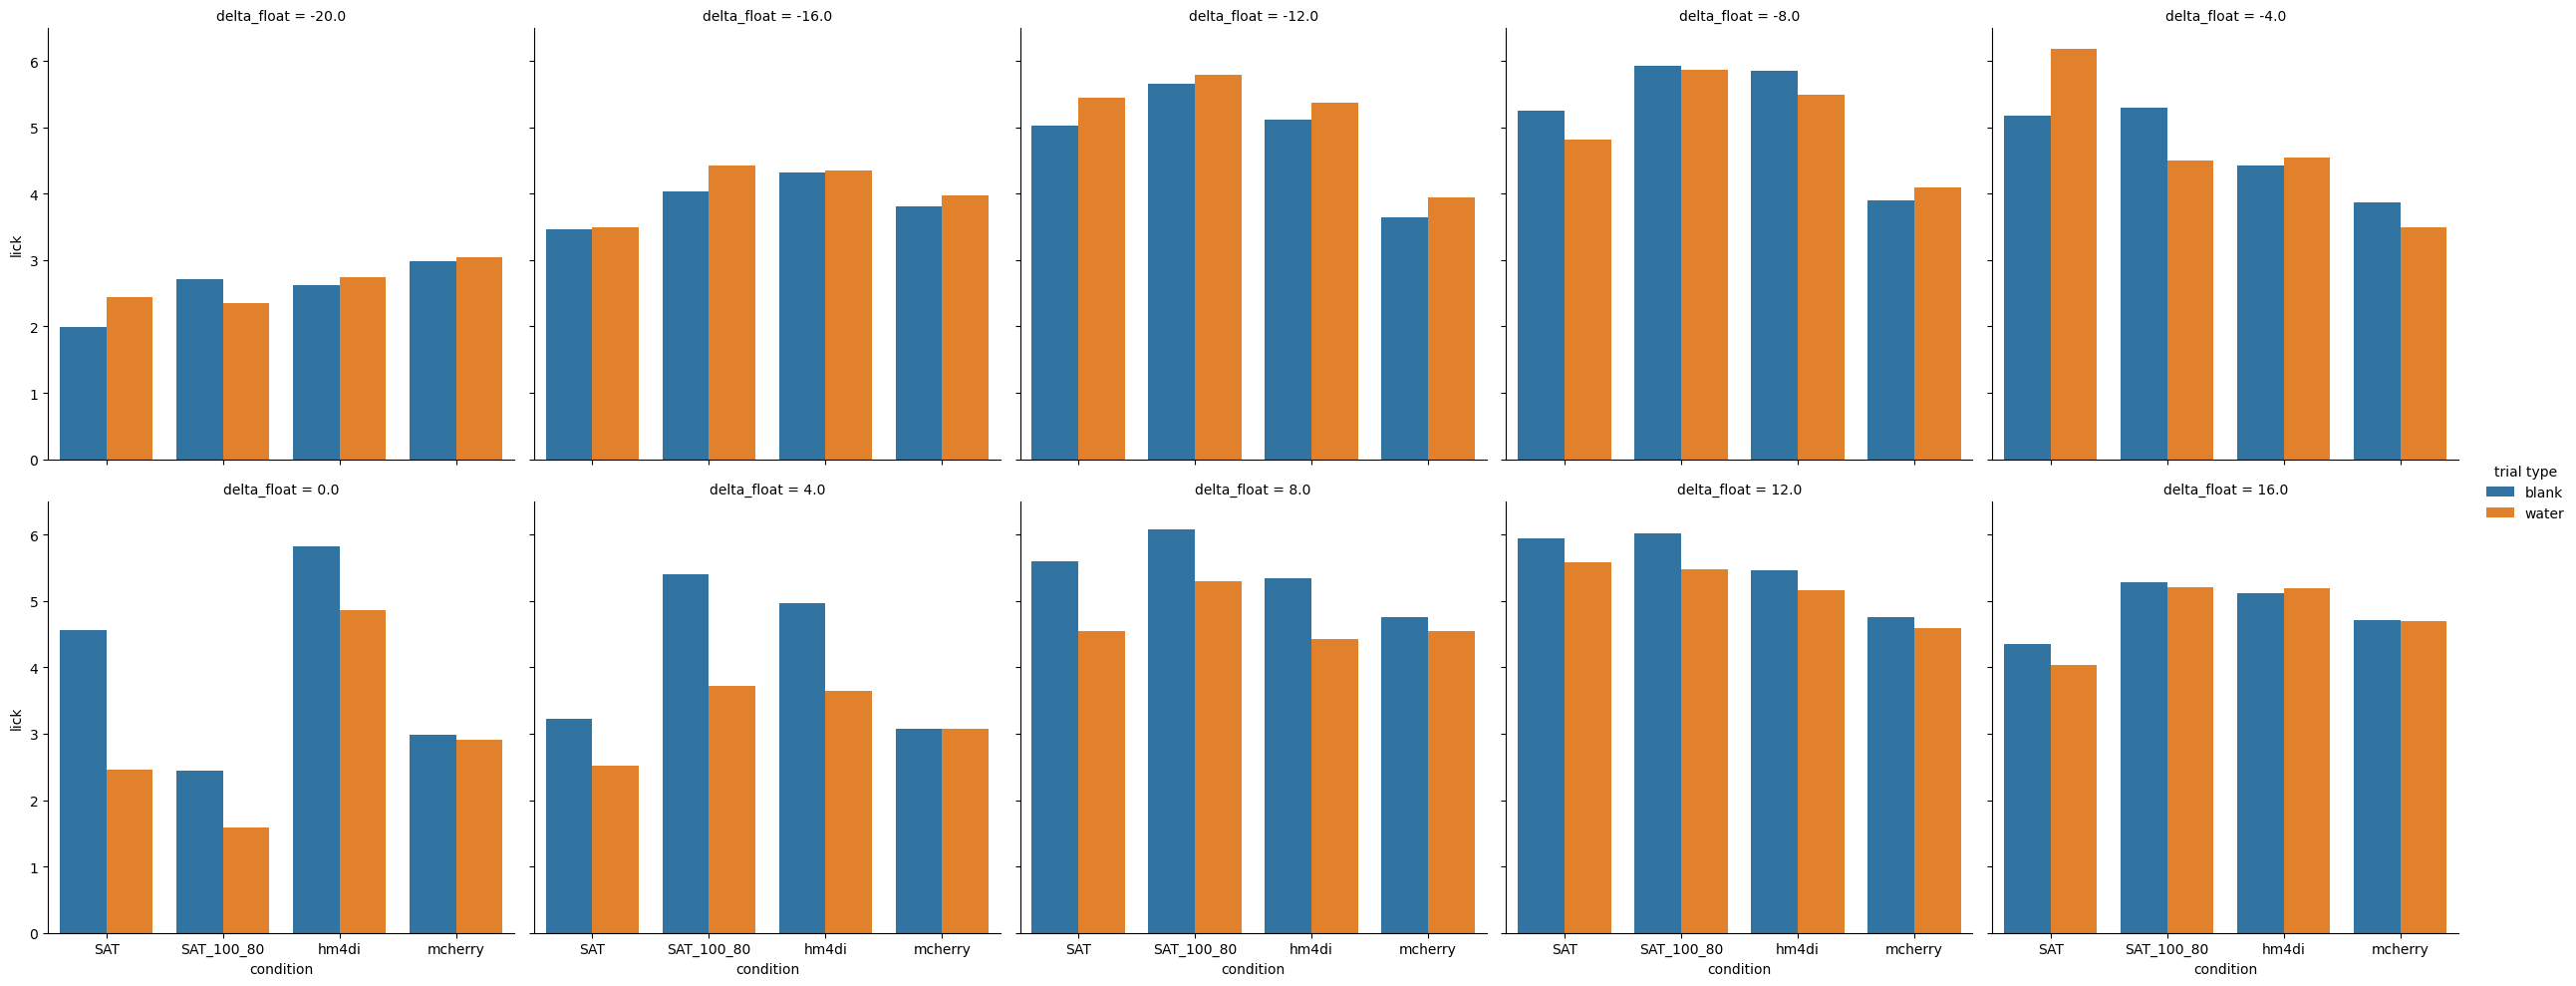

In [17]:
lick_avg = data_thresh.groupby(["condition", "delta", "delivery delta", "trial type"])["lick"].mean().reset_index()
lick_avg["delta_float"] = lick_avg["delta"].astype("timedelta64[h]")
lick_avg["delivery delta_float"] = lick_avg["delivery delta"].astype("timedelta64[ms]")
cond = (lick_avg["delta_float"] < 20) & (lick_avg["delta_float"] > -24) & (lick_avg["delivery delta_float"] > 0) & (lick_avg["delivery delta_float"] < 1000)
pt_puff = lick_avg[cond].sort_values("lick").groupby(["condition", "delta", "trial type"]).first().reset_index()
sns.catplot(data=pt_puff, kind="bar", x="condition", y="delivery delta_float", col="delta_float", col_wrap=5, hue="trial type")
sns.catplot(data=pt_puff, kind="bar", x="condition", y="lick", col="delta_float", col_wrap=5, hue="trial type")

In [18]:
data = data_sample
trial_bin="1h"

data = data.set_index(["condition", "animal", "trial no"])
data["trial time"] = data.groupby(["condition", "animal", "trial no"])["timestamp"].first()
data = data.reset_index()

group = data.groupby(["condition", "animal", "trial no", "trial type", "delivery delta", pd.Grouper(key="trial time", freq=trial_bin)])
data = group.first()
data = data.reset_index()

data = analysis_helper.delta(data, key="trial time")

min_trials = 10
min_blank = 2
min_water = 2

data = data.set_index(["condition", "animal", "delta","delivery delta", "trial type"])
group = data.groupby(["condition", "animal", "delta","delivery delta", "trial type"])
counts = group.count().unstack(level="trial type")
cond = (counts.loc[:, ("trial no", "blank")] > min_blank) & (counts.loc[:, ("trial no", "water")] > min_water) 
data = data[cond]

data = data.reset_index().set_index(["condition", "animal", "delta","delivery delta"])
total_group = data.groupby(["condition", "animal", "delta","delivery delta"]) 
total_counts = total_group.count()

data = data[total_counts["trial no"] > min_trials]
data = data.reset_index()

keep=["age", "sex", "strain", "SAT_start", "acc"]

data_bin = data.groupby(["condition", "animal", "trial type", "delta", "delivery delta"])
lick = data_bin["lick"].mean()
keep = data_bin[keep].first()

data_bin = pd.concat([lick, keep], axis=1).reset_index()

data_thresh = analysis_helper.thresh(data_bin, 200, 3000, False, True)

group = data_thresh.set_index(["condition", "animal", "delta", "delivery delta"]).groupby("trial type")
water = group.get_group("water")["lick"]
blank = group.get_group("blank")["lick"]
data_perf = water - blank
data_perf = data_perf.reset_index()
data_perf["delta_float"] = data_perf["delta"].astype("timedelta64[h]")
data_perf["delivery delta_float"] = data_perf["delivery delta"].astype("timedelta64[ms]")
data_perf

condition animal             delta           delivery delta      lick  \
0           SAT   GKO6 -2 days +08:00:00 -1 days +23:59:59.800000  0.852074   
1           SAT   GKO6 -2 days +08:00:00 -1 days +23:59:59.900000  0.939441   
2           SAT   GKO6 -2 days +08:00:00          0 days 00:00:00  0.752351   
3           SAT   GKO6 -2 days +08:00:00   0 days 00:00:00.100000  0.861937   
4           SAT   GKO6 -2 days +08:00:00   0 days 00:00:00.200000  0.704648   
...         ...    ...               ...                      ...       ...   
24605   mcherry  NIO16   0 days 16:00:00   0 days 00:00:01.300000  2.037037   
24606   mcherry  NIO16   0 days 16:00:00   0 days 00:00:01.400000  1.296296   
24607   mcherry  NIO16   0 days 16:00:00   0 days 00:00:01.500000 -2.105263   
24608   mcherry  NIO16   0 days 16:00:00   0 days 00:00:01.600000  0.116959   
24609   mcherry  NIO16   0 days 16:00:00   0 days 00:00:01.700000 -0.292398   

       delta_float  delivery delta_float  
0            -40.0                -200.0  
1            -40.0                -100.0  
2            -40.0                   0.0  
3            -40.0                 100.0  
4            -40.0                 200.0  
...            ...                   ...  
24605         16.0                1300.0  
24606         16.0                1400.0  
24607         16.0                1500.0  
24608         16.0                1600.0  
24609         16.0                1700.0  

[24610 rows x 7 columns]

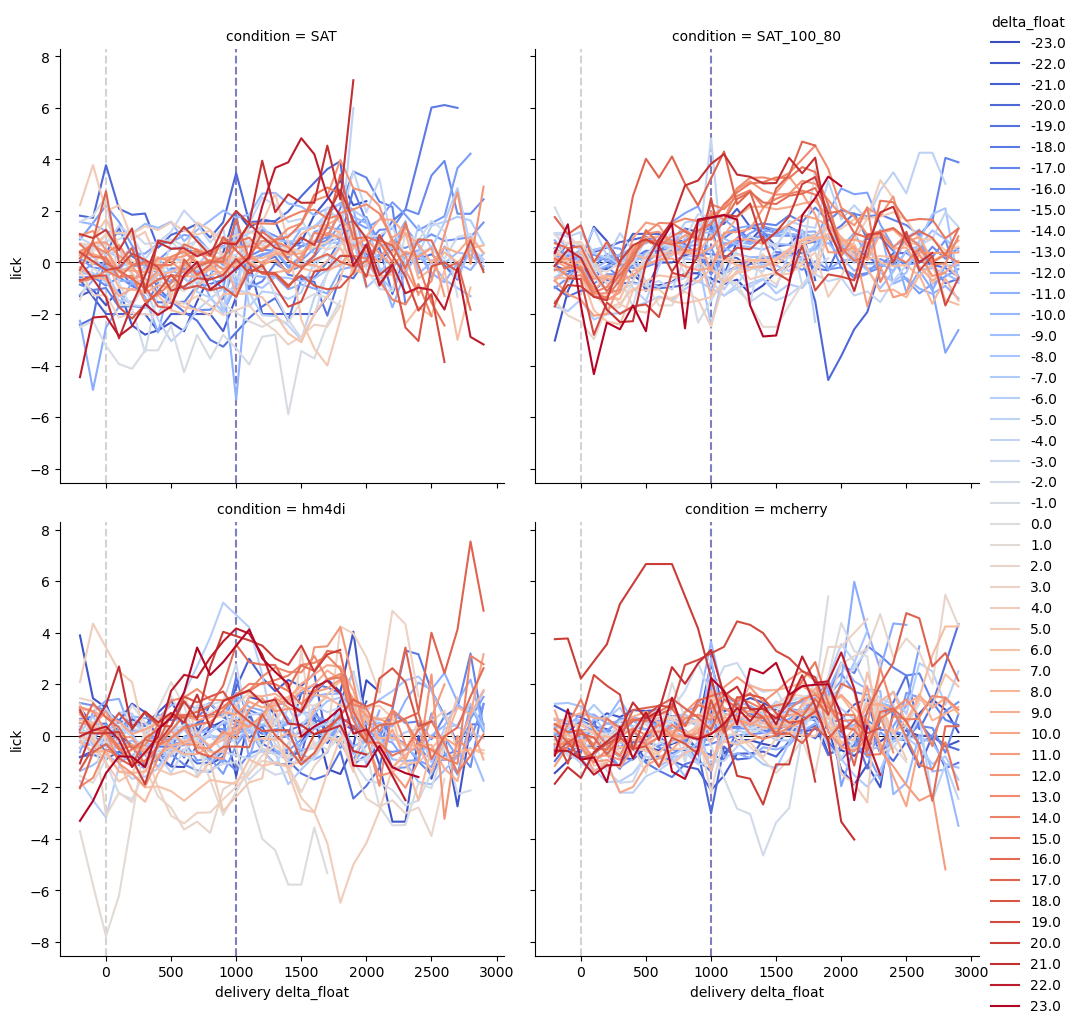

In [19]:
cond = (data_perf["delta_float"] < 24) & (data_perf["delta_float"] > -24)
g = sns.relplot(data=data_perf[cond],kind="line",x="delivery delta_float", 
                y="lick",col="condition", col_wrap=2,hue="delta_float", palette="coolwarm", errorbar=None,legend="full")
for ax in g.axes.flat:
    ax.axhline(y=0, xmin=0, xmax=1, ls="-", lw=0.75,color="black", zorder=0)
    ax.axvline(x=0, ymin=0, ymax=1, ls="--", color="lightgrey", zorder=0)
    ax.axvline(x=1000, ymin=0, ymax=1, ls="--", color="navy", alpha=0.5, zorder=0)

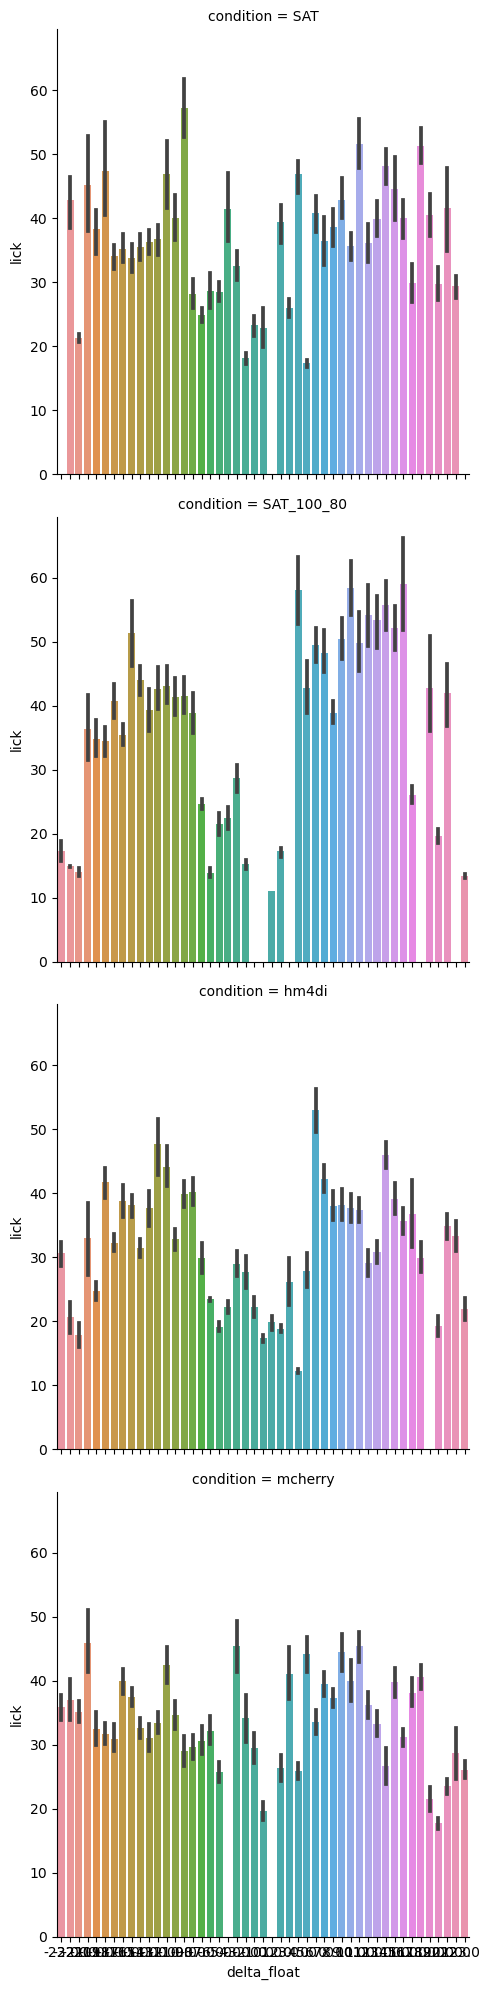

In [20]:
counts = data.groupby(["condition", "animal", "delta", "delivery delta"]).count().reset_index()
counts["delta_float"] = counts["delta"].astype("timedelta64[h]")
cond = (counts["delta_float"] < 24) & (counts["delta_float"] > -24) 
sns.catplot(counts[cond], x="delta_float", y="lick", col="condition", col_wrap=1, kind='bar')

In [21]:
freq = analysis_helper.freqCurve(aa, 300)
freq
#resamples trial time into bins, leaving other columns/index alone (easiest to do this way to maintain alignment of columns)
#in particular does not effect lick frequency or delivery delta calculations
group = freq.groupby(["condition", "animal", "trial no", "trial type", "delivery delta", pd.Grouper(key="timestamp", freq="4h")])
freqbinned = group.first()
freqbinned= freqbinned.reset_index()
freqbinned["delta"] = freqbinned["timestamp"]
freqbinned["timestamp"] = freq["timestamp"]

freqbinned
perf = analysis_helper.thresh(perf, 2000, 3000, False, True)

perf["delta"] = perf["delta"] - perf.sort_values("delta").groupby("animal")["delta"].first() - perf.groupby("animal")["acc"].first()
perf["delta"] = perf["delta"].astype("timedelta64[h]")
perf["delivery delta"] = perf["delivery delta"].astype("timedelta64[ms]")
cond = (perf["delta"] < 24) & (perf["delta"] > -24)
g = sns.relplot(data=perf[(perf["trial type"] == "perf") & cond ],kind="line",x="delivery delta", 
                y="lick",col="condition", col_wrap=2,hue="delta", palette="coolwarm", errorbar=None,legend="full")
for ax in g.axes.flat:
    ax.axhline(y=0, xmin=0, xmax=1, ls="-", lw=0.75,color="black", zorder=0)
    ax.axvline(x=0, ymin=0, ymax=1, ls="--", color="lightgrey", zorder=0)
    ax.axvline(x=1000, ymin=0, ymax=1, ls="--", color="navy", alpha=0.5, zorder=0)

data=freqbinned.reset_index().set_index(["condition", "animal", "delivery delta", "delta"]) 
lk_group = data.groupby(["condition", "animal", "delivery delta", "delta", "trial type"])
counts = lk_group.count().unstack(level="trial type")
cond = (counts.loc[:, ("trial no", "blank")] > 10) & (counts.loc[:, ("trial no", "water")] > 10) 
filtered = data[cond].reset_index()


perf = analysis_helper.performance(filtered)
perf = analysis_helper.thresh(perf, 2000, 3000, False, True)

#perf = perf.set_index(["condition", "animal"])
perf["delta"] = perf["delta"] - perf.sort_values("delta").groupby("animal")["delta"].first() - perf.groupby("animal")["acc"].first()
perf["delta"] = perf["delta"].astype("timedelta64[h]")
perf["delivery delta"] = perf["delivery delta"].astype("timedelta64[ms]")
perf = perf.reset_index()

#filtered["delta"] = filtered["delta"] - filtered.sort_values("delta").groupby("animal")["delta"].first() - filtered.groupby("animal")["acc"].first()
#filtered["delta"] = filtered["delta"].astype("timedelta64[h]")
#filtered["delivery delta"] = filtered["delivery delta"].astype("timedelta64[ms]")
#filtered = filtered.reset_index()
perf


cond = (perf["delta"] < 24) & (perf["delta"] > -24)
g = sns.relplot(data=perf[(perf["trial type"] == "perf") & cond],kind="line",x="delivery delta", 
                y="lick",col="condition", col_wrap=2,hue="delta", palette="coolwarm", errorbar=None,legend="full")
for ax in g.axes.flat:
    ax.axhline(y=0, xmin=0, xmax=1, ls="-", lw=0.75,color="black", zorder=0)
    ax.axvline(x=0, ymin=0, ymax=1, ls="--", color="lightgrey", zorder=0)
    ax.axvline(x=1000, ymin=0, ymax=1, ls="--", color="navy", alpha=0.5, zorder=0)
#end = perf.groupby(["condition", "animal", "delta"]).max()["delivery delta"]
start = perf.groupby(["condition", "animal", "delta"]).min()#.reset_index()#.set_index(["condition", "animal"])
#perf = perf.set_index(["condition", "animal"])
flt = perf[(perf["delivery delta"] > 0)& (perf["delivery delta"] < 1000)]
flt[flt["trial type"] == "perf"].sort_values(["animal", "delta", "delivery delta"])
means = flt.groupby(["condition", "delta", "delivery delta", "trial type"]).mean().reset_index()
delta = flt.groupby(["condition", "delta", "trial type"])[["delivery delta", "lick"]].diff()
flt[["deltax", "deltay"]] = delta
flt["slope"] = flt["deltay"]/(flt["deltax"]/1000)
slope = flt.groupby(["condition", "trial type", "delta"])["slope"].mean().reset_index()
#means[means["delta"] == 16]
slope
cond = (slope["delta"] < 24) & (slope["delta"] > -24)
g = sns.catplot(data=slope[(slope["trial type"] == "perf") & cond],x="delta", 
                y="slope",col="condition", col_wrap=2,hue="delta", palette="coolwarm", kind="bar")
cond = (flt["delta"] < 24) & (flt["delta"] > -24)
g = sns.catplot(data=flt[(flt["trial type"] == "perf") & cond],x="delta", 
                y="slope",col="condition", col_wrap=2,hue="delta", palette="coolwarm", kind="box")


TypeError: freqCurve() missing 1 required positional argument: 'keep'